┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0014\ising.gif
└ @ Plots D:\.julia\packages\Plots\avj9X\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0014\\ising.gif")
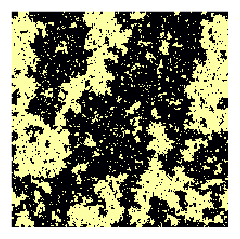

In [5]:
module Ising

using Random

struct Board{S, T, U, V} state::S; β::T; prob::U; rng::V end

function initialboard(; n=200, β=log(1 + √2)/2, rng=MersenneTwister())
    state = rand((Int8(-1), Int8(1)), n, n)
    prob = Tuple(exp(-2β*k) for k in -4:4)
    Board(state, β, prob, rng)
end

P(i, m) = ifelse(i == m, m, i+1)
Q(i, m) = ifelse(i == 1, m, i-1)

function update!(board::Board, niters)
    s, prob, rng = board.state, board.prob, board.rng
    m, n = size(s)
    for _ in 1:niters, j in 1:n, i in 1:m
        sij = s[i,j]
        k = sij * (s[Q(i, m), j] + s[P(i, m), j] + s[i, Q(j, n)] + s[i, P(j, n)])
        s[i, j] = ifelse(rand(rng) < prob[k+5], -sij, sij)
    end
end

end

using Plots
default(size=(240, 240), colorbar=false, ticks=false, axis=false)

board = Ising.initialboard()
anim = @animate for _ in 1:100
    Ising.update!(board, 100)
    heatmap(board.state)
end
gif(anim, "ising.gif", fps=10)

```julia
module SomeModule

struct Board{...} board state, etc. end

function initialboard(...)
    initialize the board state, etc.
    Board(state, ...)
end

function update!(board::Board, niters)
    update the board state, niters times.
end

end

board = SomeModule.initialboard()
@gif for _ in 1:100
    Ising.update!(board, 100)
    plot the board state.
end
```